In [459]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re
import pickle
from math import radians,sin,cos,acos
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.metrics import recall_score,f1_score,roc_auc_score,confusion_matrix
from sklearn.svm import SVC
from time import time
%matplotlib inline

In [4]:
weather=pd.read_csv('weatherAUS5000.csv',index_col=0)

In [6]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           5000 non-null   object 
 1   Location       5000 non-null   object 
 2   MinTemp        4979 non-null   float64
 3   MaxTemp        4987 non-null   float64
 4   Rainfall       4950 non-null   float64
 5   Evaporation    2841 non-null   float64
 6   Sunshine       2571 non-null   float64
 7   WindGustDir    4669 non-null   object 
 8   WindGustSpeed  4669 non-null   float64
 9   WindDir9am     4651 non-null   object 
 10  WindDir3pm     4887 non-null   object 
 11  WindSpeed9am   4949 non-null   float64
 12  WindSpeed3pm   4919 non-null   float64
 13  Humidity9am    4936 non-null   float64
 14  Humidity3pm    4880 non-null   float64
 15  Pressure9am    4506 non-null   float64
 16  Pressure3pm    4504 non-null   float64
 17  Cloud9am       3111 non-null   float64
 18  Cloud3pm

In [27]:
weather.isnull().sum()/weather.shape[0]*100

Date              0.00
Location          0.00
MinTemp           0.42
MaxTemp           0.26
Rainfall          1.00
Evaporation      43.18
Sunshine         48.58
WindGustDir       6.62
WindGustSpeed     6.62
WindDir9am        6.98
WindDir3pm        2.26
WindSpeed9am      1.02
WindSpeed3pm      1.62
Humidity9am       1.28
Humidity3pm       2.40
Pressure9am       9.88
Pressure3pm       9.92
Cloud9am         37.78
Cloud3pm         39.76
Temp9am           0.66
Temp3pm           1.76
RainTomorrow      0.00
dtype: float64

In [8]:
x=weather.iloc[:,:-1]
y=weather.iloc[:,-1]

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)

In [431]:
print(x_train.shape)
print(x_test.shape)

(4000, 21)
(1000, 21)


In [12]:
for dataset in [x_train,x_test,y_train,y_test]:
    dataset.reset_index(drop=True,inplace=True)

In [15]:
x_train.describe([0.0,0.2,0.5,0.7,0.9,0.99]).T

,count,mean,std,min,0%,20%,50%,70%,90%,99%,max
MinTemp,3981.0,12.121854,6.364655,-8.5,-8.5,6.60,12.0,15.50,20.8,25.700,29.0
MaxTemp,3990.0,23.144185,7.162644,-3.7,-3.7,16.80,22.6,27.00,33.0,39.811,46.4
Rainfall,3959.0,2.379843,7.887643,0.0,0.0,0.00,0.0,0.20,6.0,39.020,115.8
Evaporation,2269.0,5.609696,4.325152,0.0,0.0,2.20,4.8,6.80,10.2,20.728,56.0
Sunshine,2045.0,7.558582,3.823647,0.0,0.0,3.78,8.4,10.20,12.0,13.400,13.9
WindGustSpeed,3742.0,39.911010,13.450746,9.0,9.0,30.00,39.0,46.00,57.0,76.000,122.0
WindSpeed9am,3963.0,14.064850,8.836423,0.0,0.0,7.00,13.0,19.00,26.0,39.000,72.0
WindSpeed3pm,3940.0,18.577157,8.629868,0.0,0.0,11.00,19.0,22.00,30.0,43.000,61.0
Humidity9am,3947.0,68.819356,18.778109,2.0,2.0,53.00,70.0,80.00,94.0,100.000,100.0
Humidity3pm,3904.0,51.452613,20.660756,2.0,2.0,33.00,52.0,63.00,78.0,98.000,100.0


In [33]:
print(y_train.value_counts(),'\n',y_train.value_counts()[0]/y_train.value_counts()[1])
print(y_test.value_counts(),'\n',y_test.value_counts()[0]/y_test.value_counts()[1])

No     3085
Yes     915
Name: RainTomorrow, dtype: int64 
 3.371584699453552
No     776
Yes    224
Name: RainTomorrow, dtype: int64 
 3.4642857142857144


In [38]:
label_encoder=LabelEncoder()
label_encoder.fit(y_train)
y_train_copy=label_encoder.transform(y_train)
y_test_copy=label_encoder.transform(y_test)

In [174]:
x_train_copy=x_train.copy()
x_test_copy=x_test.copy()

x_train_copy['Date']=pd.DatetimeIndex(x_train.Date).strftime('%m').astype(np.int)
x_test_copy['Date']=pd.DatetimeIndex(x_test.Date).strftime('%m').astype(np.int)

x_train_copy.rename({'Date':'Month'},axis=1,inplace=True)
x_test_copy.rename({'Date':'Month'},axis=1,inplace=True)

In [175]:
x_train_copy.Location.unique()

array(['Nuriootpa', 'Perth', 'Bendigo', 'Albury', 'CoffsHarbour',
       'WaggaWagga', 'Williamtown', 'Dartmoor', 'Ballarat', 'Sale',
       'Tuggeranong', 'Townsville', 'Launceston', 'Darwin', 'Albany',
       'Cobar', 'NorfolkIsland', 'Sydney', 'SydneyAirport',
       'MelbourneAirport', 'Witchcliffe', 'MountGinini', 'Adelaide',
       'Portland', 'SalmonGums', 'Hobart', 'MountGambier', 'Woomera',
       'Wollongong', 'Mildura', 'AliceSprings', 'PerthAirport',
       'Melbourne', 'Brisbane', 'Watsonia', 'Cairns', 'Penrith',
       'PearceRAAF', 'NorahHead', 'Nhil', 'Richmond', 'Newcastle',
       'Moree', 'Uluru', 'Walpole', 'GoldCoast', 'Canberra', 'Katherine',
       'BadgerysCreek'], dtype=object)

In [432]:
x_test_copy.shape

(1000, 24)

In [176]:
fp = open('geo_dict.pkl','rb')
geo_dict = pickle.load(fp)

In [177]:
geo_dict['Dartmoor']
geo_dict['Sale']='38.111° S 147.068° E'
geo_dict['Albany']='35.0269° S 117.8837° E'
geo_dict['NorfolkIsland']='29.0408° S 167.9547° E'
geo_dict['Witchcliffe']='34.0136° S 115.0975° E'
geo_dict['MountGinini']='35.5283° S 148.7723° E'
geo_dict['Portland']='38.3523° S 141.6067° E'
geo_dict['SalmonGums']='32.9532° S 121.6448° E'
geo_dict['PerthAirport']='31.9385° S 115.9672° E'
geo_dict['Penrith']='33.7479° S 150.6974° E'
geo_dict['NorahHead']='33.2827° S 151.5674° E'
geo_dict['Uluru']='25.3430° S 131.0369° E'
geo_dict['Walpole']='34.9684° S 116.7682° E'
geo_dict['Richmond']='37.8182° S 145.0018° E'

In [178]:
x_train_copy['Coord']=x_train_copy['Location'].map(geo_dict)
x_test_copy['Coord']=x_test_copy['Location'].map(geo_dict)

In [179]:
x_train_copy['Coord']=x_train_copy['Coord'].astype(str)
x_test_copy['Coord']=x_test_copy['Coord'].astype(str)

In [180]:
def long_lat(x,number):
    result=re.search(r'(.*?)° S(.*?)° E',str(x)).group(number).strip()
    return result


In [181]:
x_train_copy['Coord']=x_train_copy['Coord'].apply(lambda x:[long_lat(x,1),long_lat(x,2)] )
x_test_copy['Coord']=x_test_copy['Coord'].apply(lambda x:[long_lat(x,1),long_lat(x,2)] )

In [204]:
x_train_copy['Coord']

0       [34.4683, 138.9977]
1       [31.9522, 115.8614]
2       [36.7582, 144.2802]
3        [36.0748, 146.924]
4       [30.2963, 153.1135]
               ...         
3995     [27.8433, 153.339]
3996    [31.9522, 115.8614]
3997    [42.8794, 147.3294]
3998    [32.9295, 151.7801]
3999    [33.2827, 151.5674]
Name: Coord, Length: 4000, dtype: object

In [196]:
major_city_dict=dict()
major_cities=['Brisbane','Sydney','Melbourne','Darwin','Hobart','Perth','Adelaide']

for major_city in major_cities:
    data=geo_dict[major_city]
    long=long_lat(data,1)
    lat=long_lat(data,2)
    major_city_dict[major_city]=[float(long),float(lat)]
major_city_dict

{'Brisbane': [27.4679, 153.0281],
 'Sydney': [33.8679, 151.2073],
 'Melbourne': [37.814, 144.9633],
 'Darwin': [12.4611, 130.8419],
 'Hobart': [42.8794, 147.3294],
 'Perth': [31.9522, 115.8614],
 'Adelaide': [34.9287, 138.5986]}

In [254]:
# d/R=arcos[cos(Y1)*cos(Y2)*cos(X1-X2)+sin(Y1)*sin(Y2)]。

def city_belong(x_train_copy):
    for i in x_train_copy.index:
        x1=x_train_copy['Coord'].loc[i][0]
        x1=radians(float(x1))
        y1=x_train_copy['Coord'].loc[i][1]
        y1=radians(float(y1))
        distances=list()
        cities=list()
        for j in major_city_dict:
            x2=major_city_dict[j][0]
            y2=major_city_dict[j][1]
            x2=radians(float(x2))
            y2=radians(float(y2))
            distance=cos(y1)*cos(y2)*cos(x1-x2)+sin(y1)*sin(y2)
            distance=np.arccos(round(distance,4))
            distances.append(distance)
            cities.append(j)
        index=np.argsort(distances)[0]
        city_belong=cities[index]
        x_train_copy.loc[i,['city_belong']]=city_belong

city_belong(x_train_copy)   
city_belong(x_test_copy)

In [271]:
major_city_climate=dict()
# ['Brisbane','Sydney','Melbourne','Darwin','Hobart','Perth','Adelaide']
major_city_climate['Brisbane']='Warm humid summer, mild winter'
major_city_climate['Sydney']='Warm temperate'
major_city_climate['Melbourne']='Mild temperate '
major_city_climate['Darwin']='High humidity summer, warm winter'
major_city_climate['Hobart']='Cool temperate'
major_city_climate['Perth']='Warm temperate  '
major_city_climate['Adelaide']='Warm temperate'

In [272]:
x_train_copy['climate']=x_train_copy['city_belong'].map(major_city_climate)
x_test_copy['climate']=x_test_copy['city_belong'].map(major_city_climate)

In [433]:
x_train_copy2=x_train_copy.copy()
x_test_copy2=x_test_copy.copy()
x_train_copy2.drop(labels=['Coord','city_belong','Location'],axis=1,inplace=True)
x_test_copy2.drop(labels=['Coord','city_belong','Location'],axis=1,inplace=True)

In [434]:
x_train_copy2['climate']=x_train_copy2['climate'].apply(lambda x: re.sub(',','',x.strip()))
x_test_copy2['climate']=x_test_copy2['climate'].apply(lambda x: re.sub(',','',x.strip()))

In [435]:
x_train_copy2.T

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
Month,7,3,5,10,10,5,9,9,1,9,...,11,4,7,6,4,10,7,5,1,9
MinTemp,6.4,15.8,8.1,6.2,17.2,5,7,11,11.8,-0.1,...,13.8,13.2,7,0.1,15.3,9,10.6,9.8,20.8,6.8
MaxTemp,12.2,33.8,16.9,23.7,25.8,21.9,19.6,14.6,29.6,17.8,...,25.3,17.3,11.3,14.4,21.2,21.5,19.8,19.2,29.2,15.4
Rainfall,0,0,0,0,1,0,0,0.2,0,0,...,0,10.4,6,0,0.8,0,0.4,7.6,0,0.2
Evaporation,2.8,10,NaN,NaN,NaN,2.8,6.4,4.4,NaN,3.4,...,6,5.6,2,NaN,NaN,7.8,2.2,0.8,NaN,NaN
Sunshine,0.2,11.7,NaN,NaN,NaN,10,6,4.2,NaN,9.4,...,NaN,8.2,4.3,NaN,NaN,11.9,4.1,8.1,NaN,NaN
WindGustDir,ENE,NE,W,SSW,NNE,NaN,SE,W,S,W,...,WSW,NW,W,NW,SSW,SE,WNW,NW,NaN,SSW
WindGustSpeed,39,35,28,20,61,NaN,37,54,35,31,...,46,57,67,48,39,35,31,43,NaN,67
WindDir9am,NE,ENE,NaN,ESE,N,ENE,SW,NW,SSE,WNW,...,N,SW,W,N,SW,SE,NaN,NNW,NE,WSW
WindDir3pm,NE,SE,NW,NW,NNE,WSW,ESE,W,S,E,...,WSW,WSW,WSW,NW,S,ESE,W,NW,SE,SSW


In [436]:
x_train_copy2['RainTody']=0
# x_train_copy2.loc[x_train['Rainfall']>=1,['RainTody']]='Yes'
# x_train_copy2.loc[x_train['Rainfall']<1,['RainTody']]='No'
# x_train_copy2.loc[x_train['Rainfall']==np.nan,['RainTody']]=np.nan

x_test_copy2['RainTody']=0
# x_test_copy2.loc[x_test['Rainfall']>=1,['RainTody']]='Yes'
# x_test_copy2.loc[x_test['Rainfall']<1,['RainTody']]='No'
# x_test_copy2.loc[x_test['Rainfall']==np.nan,['RainTody']]=np.nan


# def RainToday(data):
#     for i in data.index:
#         data['RainTody'].loc[i]=data['Rainfall'].apply(lambda x: 'Yes' if x>=1 else 'No' if x<1 else np.nan)
x_train_copy2['RainTody']=x_train_copy2['Rainfall'].apply(lambda x: 'Yes' if x>=1 else 'No' if x<1 else np.nan) 
x_test_copy2['RainTody']=x_test_copy2['Rainfall'].apply(lambda x: 'Yes' if x>=1 else 'No' if x<1 else np.nan)

In [437]:
obj_type=list(x_train_copy2.columns[x_train_copy2.dtypes==object])
obj_type+=['Cloud9am', 'Cloud3pm']
obj_type

['WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'climate',
 'RainTody',
 'Cloud9am',
 'Cloud3pm']

In [438]:
x_train_copy2.columns

Index(['Month', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'climate', 'RainTody'],
      dtype='object')

In [439]:
SI=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
SI.fit(x_train_copy2[obj_type])
x_train_copy2[obj_type]=SI.transform(x_train_copy2[obj_type])
x_test_copy2[obj_type]=SI.transform(x_test_copy2[obj_type])

In [440]:
x_train_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          4000 non-null   int64  
 1   MinTemp        3981 non-null   float64
 2   MaxTemp        3990 non-null   float64
 3   Rainfall       3959 non-null   float64
 4   Evaporation    2269 non-null   float64
 5   Sunshine       2045 non-null   float64
 6   WindGustDir    4000 non-null   object 
 7   WindGustSpeed  3742 non-null   float64
 8   WindDir9am     4000 non-null   object 
 9   WindDir3pm     4000 non-null   object 
 10  WindSpeed9am   3963 non-null   float64
 11  WindSpeed3pm   3940 non-null   float64
 12  Humidity9am    3947 non-null   float64
 13  Humidity3pm    3904 non-null   float64
 14  Pressure9am    3597 non-null   float64
 15  Pressure3pm    3594 non-null   float64
 16  Cloud9am       4000 non-null   float64
 17  Cloud3pm       4000 non-null   float64
 18  Temp9am 

In [441]:
OE=OrdinalEncoder()
OE.fit(x_train_copy2[obj_type])
x_train_copy2[obj_type]=OE.transform(x_train_copy2[obj_type])
x_test_copy2[obj_type]=OE.transform(x_test_copy2[obj_type])

In [442]:
val_type=list(x_train_copy2.columns)
for i in obj_type:
    val_type.remove(i)
     
print(val_type)

SI1=SimpleImputer(missing_values=np.nan,strategy='mean')
SI1.fit(x_train_copy2[val_type])
x_train_copy2[val_type]=SI1.transform(x_train_copy2[val_type])
x_test_copy2[val_type]=SI1.transform(x_test_copy2[val_type])

['Month', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [443]:
x_test_copy2.isnull().sum()

Month            0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
climate          0
RainTody         0
dtype: int64

In [444]:
x_train_copy2

,Month,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,climate,RainTody
0,7.0,6.4,12.2,0.0,2.800000,0.200000,1.0,39.00000,4.0,4.0,...,65.0,72.0,1019.10000,1013.500000,7.0,7.0,8.2,9.9,4.0,0.0
1,3.0,15.8,33.8,0.0,10.000000,11.700000,4.0,35.00000,1.0,9.0,...,51.0,16.0,1023.80000,1019.700000,0.0,0.0,20.0,32.8,4.0,0.0
2,5.0,8.1,16.9,0.0,5.609696,7.558582,13.0,28.00000,9.0,7.0,...,85.0,50.0,1019.70000,1016.700000,8.0,8.0,10.9,16.7,2.0,0.0
3,10.0,6.2,23.7,0.0,5.609696,7.558582,11.0,20.00000,2.0,7.0,...,63.0,35.0,1023.90000,1021.100000,7.0,7.0,13.7,22.5,2.0,0.0
4,10.0,17.2,25.8,1.0,5.609696,7.558582,5.0,61.00000,3.0,5.0,...,66.0,66.0,1022.20000,1017.200000,1.0,7.0,22.3,23.6,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,10.0,9.0,21.5,0.0,7.800000,11.900000,9.0,35.00000,9.0,2.0,...,52.0,20.0,1025.60000,1024.300000,0.0,0.0,12.4,19.9,3.0,0.0
3996,7.0,10.6,19.8,0.4,2.200000,4.100000,14.0,31.00000,9.0,13.0,...,87.0,62.0,1024.40000,1022.900000,7.0,7.0,14.9,18.5,4.0,0.0
3997,5.0,9.8,19.2,7.6,0.800000,8.100000,7.0,43.00000,6.0,7.0,...,60.0,49.0,1015.30000,1015.800000,2.0,6.0,13.9,18.0,0.0,1.0
3998,1.0,20.8,29.2,0.0,5.609696,7.558582,12.0,39.91101,4.0,9.0,...,65.0,68.0,1017.67548,1015.277824,8.0,1.0,23.8,28.2,4.0,0.0


In [445]:
SS=StandardScaler()
val_type1=val_type.copy()
val_type1.remove('Month')
SS.fit(x_train_copy2[val_type1])
x_test_copy2[val_type1]=SS.transform(x_test_copy2[val_type1])
x_train_copy2[val_type1]=SS.transform(x_train_copy2[val_type1])

In [446]:
x_test_copy2

,Month,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,climate,RainTody
0,9.0,-0.806753,0.007803,-0.303315,0.795349,-6.068044e-01,2.0,8.371699e-02,2.0,2.0,...,-2.242213,-1.786130,1.057613,0.712431,6.0,7.0,-0.032348,0.077803,1.0,0.0
1,5.0,-0.160954,-0.048119,-0.303315,-0.371435,8.200393e-01,12.0,5.462355e-16,13.0,0.0,...,0.277769,-0.267171,0.982332,0.772779,1.0,1.0,-0.542343,-0.095448,4.0,0.0
2,6.0,-0.066447,-1.180545,0.206491,0.000000,-3.249466e-16,8.0,1.467482e+00,11.0,11.0,...,0.921168,0.957796,1.253341,1.466777,8.0,8.0,-0.789613,-1.192706,4.0,1.0
3,12.0,0.532098,0.692851,-0.277824,-1.231171,-2.765363e+00,6.0,-7.619170e-01,5.0,6.0,...,1.671801,0.075820,-1.321237,-1.444999,8.0,8.0,0.153104,0.684182,2.0,0.0
4,11.0,-1.405299,0.469162,-0.303315,0.000000,-3.249466e-16,3.0,2.374686e-01,3.0,6.0,...,0.170535,-1.051150,0.214476,-0.041915,7.0,7.0,-0.202347,0.424305,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10.0,-0.491729,1.993043,-0.303315,0.000000,-3.249466e-16,6.0,6.218477e-01,5.0,3.0,...,-3.368163,-2.374115,-0.086644,-0.358740,7.0,7.0,1.605816,2.026878,1.0,0.0
996,2.0,0.122567,0.427220,-0.303315,-0.125797,1.515168e+00,10.0,-5.312896e-01,9.0,8.0,...,-0.312014,-0.267171,-0.402820,-0.388914,3.0,1.0,0.184013,0.640869,4.0,0.0
997,2.0,1.650433,1.042365,0.257472,-0.310026,1.222482e+00,10.0,-5.312896e-01,10.0,9.0,...,0.170535,0.369812,-0.914725,-0.916956,7.0,2.0,1.497635,1.218373,3.0,1.0
998,9.0,1.681936,1.210132,-0.303315,-0.125797,6.005249e-01,7.0,-7.619170e-01,1.0,3.0,...,0.009685,0.418811,-0.297428,-0.554870,7.0,5.0,1.559453,1.203935,1.0,0.0


In [450]:


for kernel in ['rbf','linear','poly','sigmoid']:
    time0=time()
    svc=SVC(kernel=kernel,gamma='auto',degree=1,cache_size=10000,random_state=0)
    svc.fit(x_train_copy2,y_train_copy)
    score=svc.score(x_test_copy2,y_test_copy)
    y_pred=svc.predict(x_train_copy2)
    recall=recall_score(y_train_copy,y_pred)
    roc_auc=roc_auc_score(y_test,svc.decision_function(x_test_copy2))
    print('kernel: %s, score: %0.2f, recall: %0.2f, roc_auc_score: %0.2f, time: %0.4f'%(kernel,score,recall,roc_auc,time()-time0))


kernel: rbf, score: 0.82, recall: 0.70, roc_auc_score: 0.82, time: 0.7978
kernel: linear, score: 0.84, recall: 0.46, roc_auc_score: 0.86, time: 0.9260
kernel: poly, score: 0.85, recall: 0.46, roc_auc_score: 0.86, time: 0.3694
kernel: sigmoid, score: 0.65, recall: 0.14, roc_auc_score: 0.45, time: 0.6311


In [448]:
print(x_test_copy2.shape)
print(x_train_copy2.shape)
print(y_test.shape)

(1000, 22)
(4000, 22)
(1000,)


In [485]:
# for higher recall

for kernel in ['rbf','linear','poly','sigmoid']:
    time0=time()
    svc=SVC(kernel=kernel,gamma='auto',degree=1,cache_size=10000,random_state=0,class_weight='balanced')
    svc.fit(x_train_copy2,y_train_copy)
    score=svc.score(x_test_copy2,y_test_copy)
    y_pred=svc.predict(x_test_copy2)
    recall=recall_score(y_test_copy,y_pred)
    roc_auc=roc_auc_score(y_test_copy,svc.decision_function(x_test_copy2))
    print('kernel: %s, score: %0.2f, recall: %0.2f, roc_auc_score: %0.2f, time: %0.4f'%(kernel,score,recall,roc_auc,time()-time0))


kernel: rbf, score: 0.80, recall: 0.63, roc_auc_score: 0.83, time: 0.7008
kernel: linear, score: 0.78, recall: 0.79, roc_auc_score: 0.86, time: 1.2349
kernel: poly, score: 0.78, recall: 0.78, roc_auc_score: 0.86, time: 0.4466
kernel: sigmoid, score: 0.56, recall: 0.29, roc_auc_score: 0.45, time: 0.9953


In [474]:
# for higher recall

for kernel in ['rbf','linear','poly','sigmoid']:
    time0=time()
    svc=SVC(kernel=kernel,gamma='auto',degree=1,cache_size=10000,random_state=0,class_weight={1:5,0:1})
    svc.fit(x_train_copy2,y_train_copy)
    score=svc.score(x_test_copy2,y_test_copy)
    y_pred=svc.predict(x_test_copy2)
    recall=recall_score(y_test_copy,y_pred)
    roc_auc=roc_auc_score(y_test_copy,svc.decision_function(x_test_copy2))
    print('kernel: %s, score: %0.2f%%, recall: %0.2f%%, roc_auc_score: %0.2f%%, time: %0.4f'%(kernel,score*100,recall*100,roc_auc*100,time()-time0))


kernel: rbf, score: 78.00%, recall: 61.61%, roc_auc_score: 80.91%, time: 0.7004
kernel: linear, score: 72.50%, recall: 84.38%, roc_auc_score: 85.96%, time: 1.6964
kernel: poly, score: 72.70%, recall: 84.38%, roc_auc_score: 86.01%, time: 0.5175
kernel: sigmoid, score: 37.40%, recall: 63.39%, roc_auc_score: 45.05%, time: 1.0147


In [477]:

time0=time()
svc=SVC(kernel='linear',gamma='auto',degree=1,cache_size=10000,random_state=0,class_weight='balanced')
svc.fit(x_train_copy2,y_train_copy)

score=svc.score(x_test_copy2,y_test_copy)
y_pred=svc.predict(x_test_copy2)
recall=recall_score(y_test_copy,y_pred)
roc_auc=roc_auc_score(y_test_copy,svc.decision_function(x_test_copy2))
print('kernel: %s, score: %0.2f, recall: %0.2f, roc_auc_score: %0.2f, time: %0.4f'%('rbf',score,recall,roc_auc,time()-time0))


kernel: rbf, score: 0.78, recall: 0.79, roc_auc_score: 0.86, time: 1.1973


In [480]:
CM=confusion_matrix(y_test_copy,y_pred,labels=[1,0])
print(CM)
specificity=CM[1,1]/CM[1,:].sum()
print(specificity)

[[176  48]
 [175 601]]
0.7744845360824743


In [470]:
x_test_copy2

,Month,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,climate,RainTody
0,9.0,-0.806753,0.007803,-0.303315,0.795349,-6.068044e-01,2.0,8.371699e-02,2.0,2.0,...,-2.242213,-1.786130,1.057613,0.712431,6.0,7.0,-0.032348,0.077803,1.0,0.0
1,5.0,-0.160954,-0.048119,-0.303315,-0.371435,8.200393e-01,12.0,5.462355e-16,13.0,0.0,...,0.277769,-0.267171,0.982332,0.772779,1.0,1.0,-0.542343,-0.095448,4.0,0.0
2,6.0,-0.066447,-1.180545,0.206491,0.000000,-3.249466e-16,8.0,1.467482e+00,11.0,11.0,...,0.921168,0.957796,1.253341,1.466777,8.0,8.0,-0.789613,-1.192706,4.0,1.0
3,12.0,0.532098,0.692851,-0.277824,-1.231171,-2.765363e+00,6.0,-7.619170e-01,5.0,6.0,...,1.671801,0.075820,-1.321237,-1.444999,8.0,8.0,0.153104,0.684182,2.0,0.0
4,11.0,-1.405299,0.469162,-0.303315,0.000000,-3.249466e-16,3.0,2.374686e-01,3.0,6.0,...,0.170535,-1.051150,0.214476,-0.041915,7.0,7.0,-0.202347,0.424305,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10.0,-0.491729,1.993043,-0.303315,0.000000,-3.249466e-16,6.0,6.218477e-01,5.0,3.0,...,-3.368163,-2.374115,-0.086644,-0.358740,7.0,7.0,1.605816,2.026878,1.0,0.0
996,2.0,0.122567,0.427220,-0.303315,-0.125797,1.515168e+00,10.0,-5.312896e-01,9.0,8.0,...,-0.312014,-0.267171,-0.402820,-0.388914,3.0,1.0,0.184013,0.640869,4.0,0.0
997,2.0,1.650433,1.042365,0.257472,-0.310026,1.222482e+00,10.0,-5.312896e-01,10.0,9.0,...,0.170535,0.369812,-0.914725,-0.916956,7.0,2.0,1.497635,1.218373,3.0,1.0
998,9.0,1.681936,1.210132,-0.303315,-0.125797,6.005249e-01,7.0,-7.619170e-01,1.0,3.0,...,0.009685,0.418811,-0.297428,-0.554870,7.0,5.0,1.559453,1.203935,1.0,0.0


In [490]:
for c in np.linspace(3,5,10):
    time0=time()
    svc=SVC(kernel='linear',gamma='auto',degree=1,cache_size=10000,random_state=0,class_weight='balanced',C=c)
    svc.fit(x_train_copy2,y_train_copy)

    score=svc.score(x_test_copy2,y_test_copy)
    y_pred=svc.predict(x_test_copy2)
    recall=recall_score(y_test_copy,y_pred)
    roc_auc=roc_auc_score(y_test_copy,svc.decision_function(x_test_copy2))
    print('kernel: %s, score: %0.4f, recall: %0.4f, roc_auc_score: %0.4f, C: %0.4f, time: %0.4f'%('rbf',score,recall,roc_auc,c,time()-time0))


kernel: rbf, score: 0.7770, recall: 0.7857, roc_auc_score: 0.8582, C: 3.0000, time: 2.4893
kernel: rbf, score: 0.7760, recall: 0.7857, roc_auc_score: 0.8582, C: 3.2222, time: 2.5273
kernel: rbf, score: 0.7760, recall: 0.7857, roc_auc_score: 0.8582, C: 3.4444, time: 2.5194
kernel: rbf, score: 0.7760, recall: 0.7857, roc_auc_score: 0.8582, C: 3.6667, time: 2.9318
kernel: rbf, score: 0.7760, recall: 0.7857, roc_auc_score: 0.8583, C: 3.8889, time: 2.8556
kernel: rbf, score: 0.7760, recall: 0.7857, roc_auc_score: 0.8582, C: 4.1111, time: 2.9819
kernel: rbf, score: 0.7760, recall: 0.7857, roc_auc_score: 0.8582, C: 4.3333, time: 3.2900
kernel: rbf, score: 0.7760, recall: 0.7857, roc_auc_score: 0.8582, C: 4.5556, time: 3.3656
kernel: rbf, score: 0.7760, recall: 0.7857, roc_auc_score: 0.8582, C: 4.7778, time: 3.2921
kernel: rbf, score: 0.7760, recall: 0.7857, roc_auc_score: 0.8583, C: 5.0000, time: 3.5355


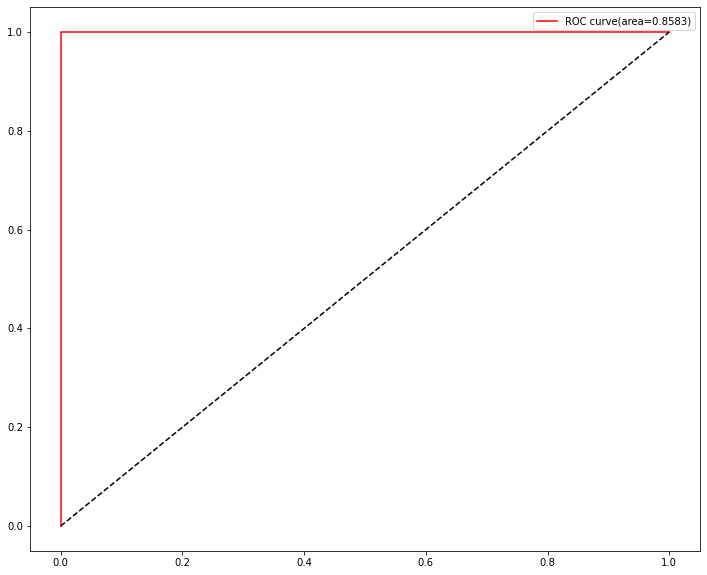

In [496]:
from sklearn.metrics import roc_curve

fpr,recall,threshold=roc_curve(y_pred,svc.decision_function(x_test_copy2),pos_label=1)

plt.figure(figsize=(12,10))
roc_auc=roc_auc_score(y_test_copy,svc.decision_function(x_test_copy2))
plt.plot(fpr,recall,c ='r',label='ROC curve(area=%0.4f)'%(roc_auc))
plt.plot([0,1],[0,1],c='k',ls='--')
plt.legend()